In [1]:
# connect colab with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# load python packages
import pandas as pd
import numpy as np
from nltk.probability import FreqDist

from matplotlib import pyplot as plt
import seaborn as sns
import random
import matplotlib.colors as mcolors

import math

from argparse import Namespace

# dataset splitting
from sklearn.model_selection import train_test_split

# Loading

In [3]:
data = pd.read_csv('/content/drive/MyDrive/summer_project_2021/airbnb/listings_new.csv')

In [4]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.77247,145.09232,Private room,60,1,4,2015-09-12,0.03,1,365,0,NaN
1,12936,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,50121,The A2C Team,NaN,Port Phillip,-37.85999,144.97662,Entire home/apt,95,3,42,2016-01-25,0.71,10,0,0,NaN
2,33111,Million Dollar Views Over Melbourne,143550,Paul,NaN,Melbourne,-37.82163,144.96672,Private room,1000,1,2,2012-01-27,0.02,1,365,0,NaN
3,38271,Melbourne - Old Trafford Apartment,164193,Daryl & Dee,NaN,Casey,-38.05725,145.33936,Entire home/apt,99,1,163,2020-01-09,1.22,1,341,13,NaN
4,41836,CLOSE TO CITY & MELBOURNE AIRPORT,182833,Diana,NaN,Darebin,-37.69729,145.00082,Private room,40,7,159,2017-08-24,1.69,2,0,0,NaN


In [5]:
data.shape
# 18016, 18

(18016, 18)

In [6]:
# check the unqiuevalue in each column
for col in data:
    print(col, len(data[col].unique()))

id 18016
name 17473
host_id 11622
host_name 4916
neighbourhood_group 1
neighbourhood 30
latitude 11205
longitude 11727
room_type 4
price 757
minimum_nights 81
number_of_reviews 366
last_review 2107
reviews_per_month 718
calculated_host_listings_count 50
availability_365 366
number_of_reviews_ltm 106
license 1


only 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'last_review', 'number_of_reviews', 'calculated_host_listings_count' and 'availability_365' will be used in new dataset.

In [7]:
# col_names = []
# for col in data.columns:
#     col_names += [col]
# col_names

# Preprocessing

## last_review split to year and month

In [8]:
data.last_review

0        2015-09-12
1        2016-01-25
2        2012-01-27
3        2020-01-09
4        2017-08-24
            ...    
18011           NaN
18012           NaN
18013           NaN
18014           NaN
18015           NaN
Name: last_review, Length: 18016, dtype: object

In [129]:
new_data = data[['neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'last_review', 'availability_365']]
# new_data.head()

In [10]:
# new_data.head(20)

In [11]:
# year
new_data['year'] = new_data.last_review
new_data.year = new_data.year.fillna('0')
for i in range(len(data)):
  new_data['year'][i] = int(new_data.year[i].split('-')[0])
# for i in range(len(data)):
#   new_data['year'][i] = new_data.last_review[i].split('-')[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [12]:
set(new_data.year)

{0, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021}

In [13]:
# month
new_data['month'] = new_data.last_review
new_data.month = new_data.month.fillna('0000-0')

for i in range(len(data)):
  new_data['month'][i] = int(new_data.month[i].split('-')[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [14]:
set(new_data.month)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [15]:
# year_month
new_data['year_month'] = new_data.last_review
new_data.year_month = new_data.year_month.fillna('0000-00')

for i in range(len(data)):
  new_data['year_month'][i] = new_data.year_month[i][0:7]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [16]:
# set(new_data.year_month)

In [17]:
new_data[['last_review','year','month', 'year_month']]
# new_data.head()

,last_review,year,month,year_month
0,2015-09-12,2015,9,2015-09
1,2016-01-25,2016,1,2016-01
2,2012-01-27,2012,1,2012-01
3,2020-01-09,2020,1,2020-01
4,2017-08-24,2017,8,2017-08
...,...,...,...,...
18011,NaN,0,0,0000-00
18012,NaN,0,0,0000-00
18013,NaN,0,0,0000-00
18014,NaN,0,0,0000-00


# User case

## 1. neighbourhood & price

In [18]:
new_data.price

0          60
1          95
2        1000
3          99
4          40
         ... 
18011      72
18012     360
18013      60
18014     120
18015     257
Name: price, Length: 18016, dtype: int64

In [19]:
new_data.neighbourhood

0          Manningham
1        Port Phillip
2           Melbourne
3               Casey
4             Darebin
             ...     
18011       Melbourne
18012      Whittlesea
18013           Yarra
18014       Melbourne
18015       Melbourne
Name: neighbourhood, Length: 18016, dtype: object

### pie chart

In [20]:
neighbourhood = new_data.neighbourhood.value_counts().to_frame()
neighbourhood.reset_index(level=0, inplace=True)
# neighbourhood

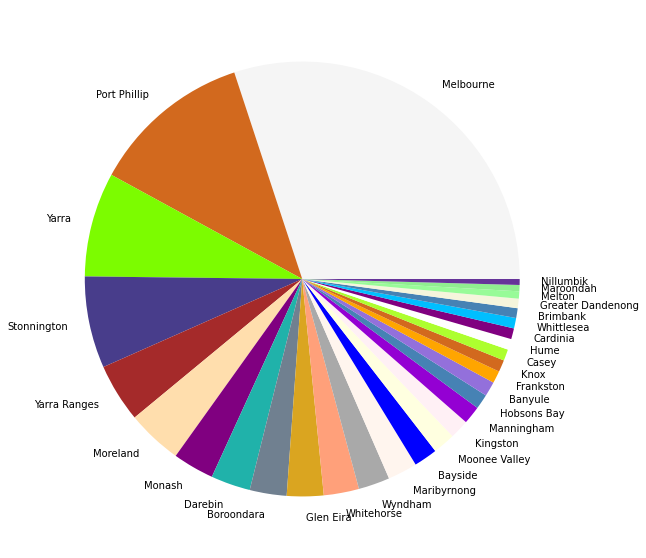

In [21]:
plt.figure(figsize=(20,10))
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = 30)
plt.pie(neighbourhood.neighbourhood, labels = neighbourhood['index'], colors=colors)
plt.show()

it can be seen that Melbourne has the most house/room in airbnb while Maroondah has the least.

### GIS


In [22]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 15.4 MB 21.9 MB/s 
     |████████████████████████████████| 6.3 MB 51.5 MB/s 


In [23]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 10]

In [24]:
neigeo = geopandas.read_file("/content/drive/MyDrive/summer_project_2021/airbnb/neighbourhoods_new.geojson")
# neigeo

# neighbourhood
nei_count = neighbourhood
nei_count.rename(columns={'index': 'neighbourhood', 'neighbourhood': 'count'}, inplace=True)
# nei_count

nei_joined = neigeo.merge(nei_count, on='neighbourhood')
# nei_joined
# nei_joined.plot()

nei_joined = neigeo.merge(nei_count, on='neighbourhood', how='left')
# nei_joined

# nei_joined['count'].fillna(0, inplace=True)
nei_joined['count'] = nei_joined['count'].astype('int')

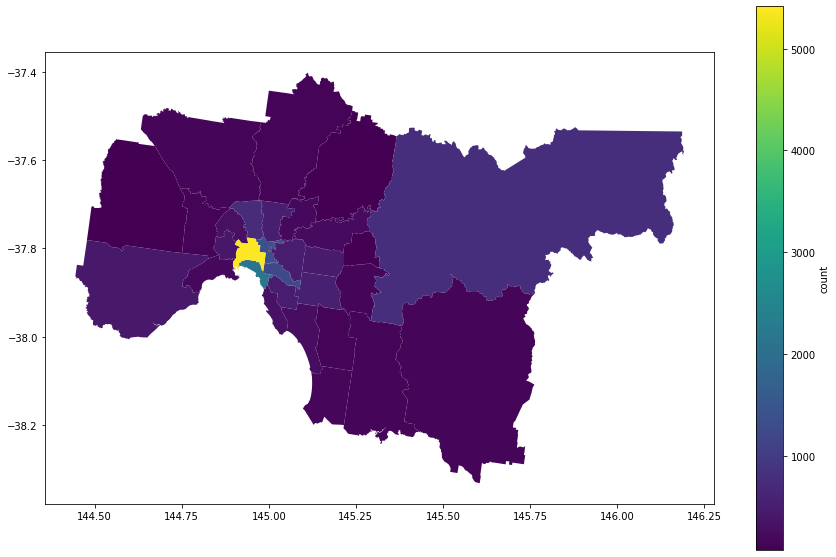

In [25]:
fig_leg, ax_leg = plt.subplots(1,1)
nei_joined.plot(column='count', ax=ax_leg, legend=True, legend_kwds={'label':'count', 'orientation':'vertical'})

It is obviously that Melbourne (5430), Port Phillip	(2256) and Yarra (1432) have more houses/rooms than other neighbourhoods. GIS plot is easier to check the relationship and also give a better visualisation that other plots as it show the geology map of the specific big region.

### barplot

In [26]:
# fig, ax = plt.subplots()
# plt.figure(figsize=(20,10))
# sns.boxplot(y='neighbourhood', x='price', data=new_data)
# sns.barplot(y=new_data.neighbourhood, x=new_data.price)

it can be seen that there are some outliers so that we can consume that the price over 1000 can be removed from the plot as they are not much and there is no any significant pattern can be found in these points

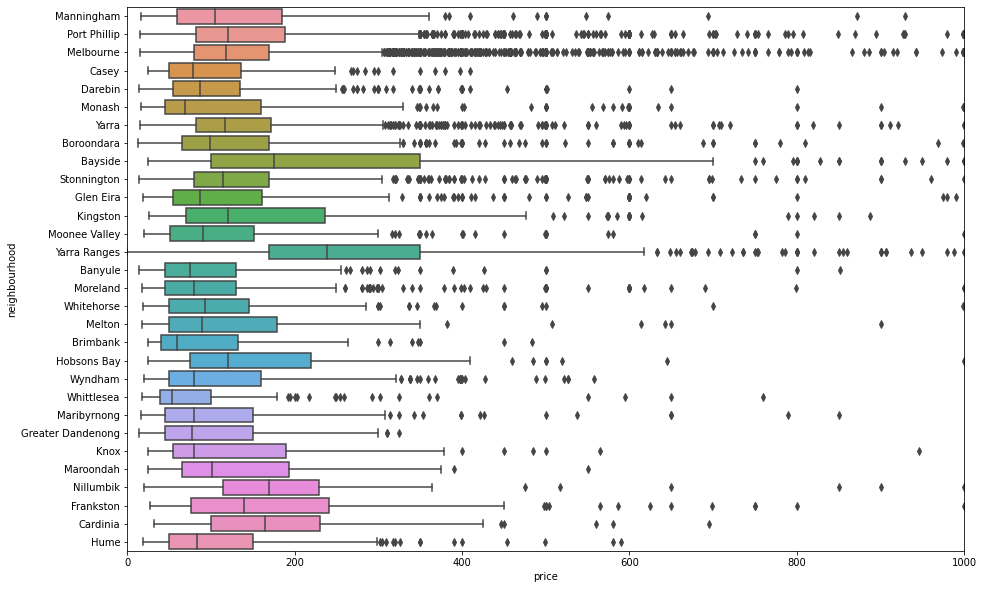

<Figure size 720x360 with 0 Axes>

In [27]:
fig, ax = plt.subplots(1,1)
plt.figure(figsize=(10,5))
sns.boxplot(y='neighbourhood', x='price', data=new_data, ax=ax)
ax.set_xlim(0,1000)
# the range of the x-axis can be changed in above code and different plots will show below
plt.show()


The plot looks much better than previous after removing the house/room prices that are too high. 

[Text(0.5, 1.0, 'Price in different neighbourhoods')]

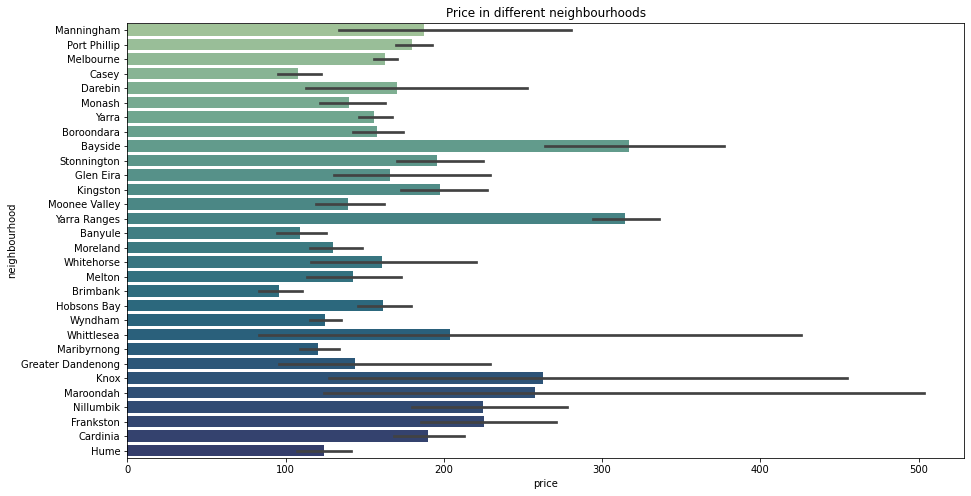

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(y=new_data.neighbourhood, x=new_data.price, palette="crest").set(Title='Price in different neighbourhoods')

The relationship is more clear in carplot than that in boxplot. The range of the x-axis is automatically set to 0-500 and it can be checked that the price in Maroondah neighbourhood has the largest range which means it is the the neighbourhood that has the most different type of house/room options. In contrast, the price is the lowest in Brimbank. Other price ranges can be easily checked in above plot.

According to GIS plot, Maroondah neighbourhood has the least number of house/room in whole Melbourne, however it has the the biggest change of price.

## 2. room_type & price

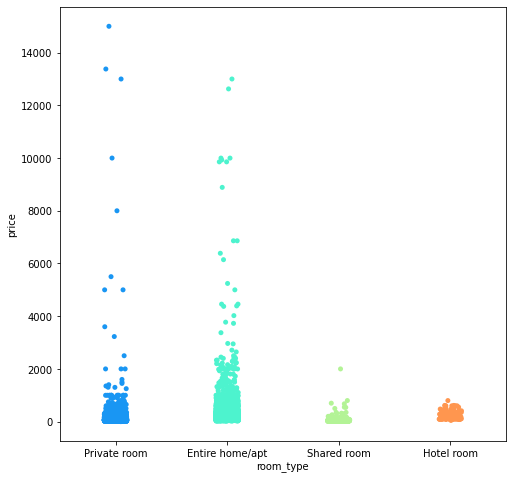

In [29]:
plt.figure(figsize=(8,8))
sns.stripplot(x='room_type',y='price',data=new_data, palette='rainbow')

It can be seen that the Private room and Entire home/apt has higher price ranges and more options than Shared room and Hotel room. As the first two types are mostly designed and built by personal house holder, they are more likely to have different locations and to satisfy customers personal preference than the rest of the two house/room types, thus these two types are more recommanded when customers have more budgets. But if customers have limit budgets, it will be more suitable to chose in shared rooms and hotel rooms during their vacations.

In [30]:
# set(new_data.minimum_nights)

### check the relationship between the top 4 neighbourhood and their room_type with the price

In [31]:
# Melbourne	5430
# Port Phillip	2256
# Yarra	1432
# Stonnington	1277
top_4 = new_data.loc[new_data.neighbourhood.isin(['Melbourne','Port Phillip', 
                                          'Yarra', 'Stonnington'])]

# top_4.head()
# top_4.shape

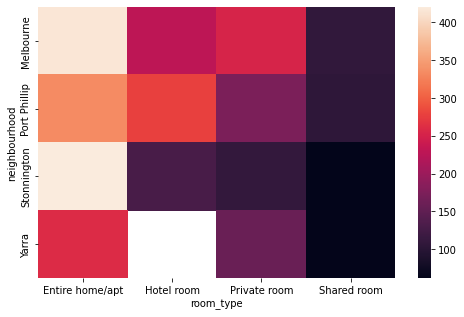

In [32]:
top_4_2 = top_4[['neighbourhood','room_type','price']].drop_duplicates().reset_index(drop=True)
top_4_3 = top_4_2.groupby(['neighbourhood', 'room_type']).mean().reset_index()

plt.figure(figsize=(8,5))
sns.heatmap(top_4_3.pivot("neighbourhood", "room_type", "price"))

It is obviously that 'Shared room' has the lowest price no matter the location of the neighbourhood and 'entire home/apt' has the highest price across Stonnington, Port Philip and Melbourne. And 'Hotel room' in Yarra has the highest price which is reached over 400 per night. The price of 'Entire home/apt' in Stonnington is way more higher that other three type of house/room that is around 400/night.






### room_type & time


(2012.0, 2021.0)

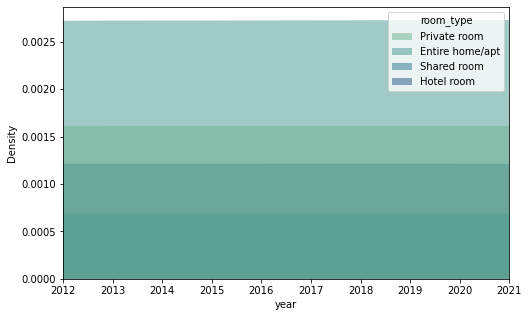

In [33]:
# room = new_data.room_type.value_counts().index
# sns.FacetGrid(new_data, row='room_type', row_order=room,
#               height=1.7, aspect=4).map(sns.kdeplot, 'year')

plt.figure(figsize=(8,5))
sns.kdeplot(
   data=new_data, x="year", hue="room_type",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.xlim(2012, 2021)

# pal = dict(Lunch="seagreen", Dinner=".7")
# g = sns.FacetGrid(new_data, hue="room_type", palette="crest", height=5)
# g.map(sns.scatterplot, "price", "year", s=100, alpha=.5)
# g.add_legend()
# plt.ylim(2010, 2022)

The density of different room types during year 2012 and 2021 is almst not changed.

(1.0, 12.0)

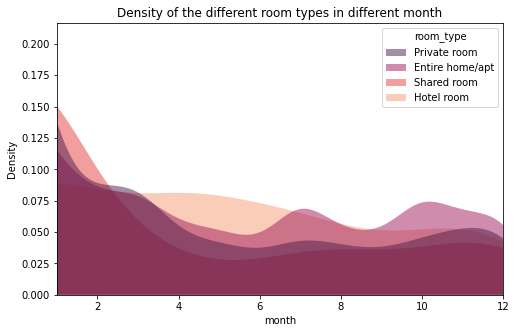

In [34]:
plt.figure(figsize=(8,5))
sns.kdeplot(
   data=new_data, x="month", hue="room_type",
   fill=True, common_norm=False, palette="rocket",
   alpha=.5, linewidth=0,
).set(title='Density of the different room types in different month')
plt.xlim(1,12)

The entire trendencies of the density in different room type are decresed from Jan to Nov. The number of 'Hotel room' and 'entire home/apt' have reached a small peak in April and May, and then it decreased again. And the number of each type of house/room is increased at the end of the year.

## 3. minimum_nights & price

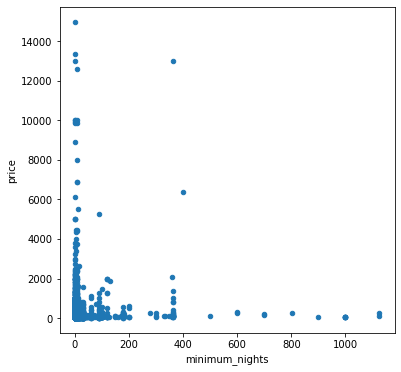

In [35]:
new_data.plot.scatter(x='minimum_nights', y='price', marker='o', figsize=(6,6))

some values mentioned the information that the minimum nights is over 100 days, these values might be the outliers or not, need to check with the data collecter.

And as there are some cases that have minimum_nights over one year (365 days), I am not sure the meaning of them

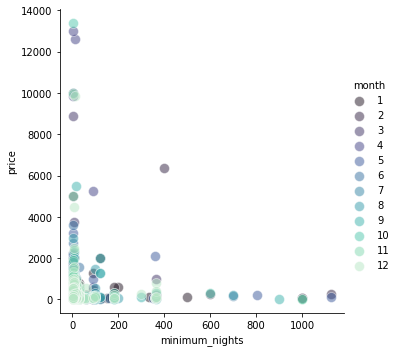

In [36]:
g = sns.FacetGrid(new_data[new_data['month'] != 0], hue="month", palette='mako', height=5)
g.map(sns.scatterplot, "minimum_nights", "price", s=100, alpha=.5)
g.add_legend()

There is no limit in the minimum_nights in most of the time during entire year, and the price is not changed much based on different minimum_nights that custmers have to book.

As most of the observations'minimum_nights' are less than 100 days, so the insight will be checked based on these data. 

In [37]:
len(new_data[new_data.minimum_nights < 100])/len(new_data)

0.9890097690941385

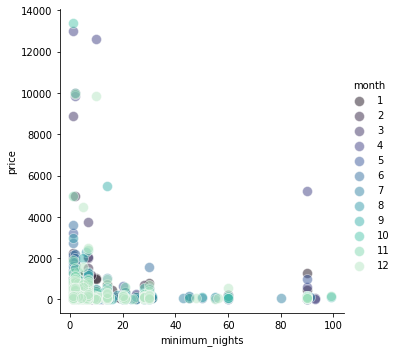

In [38]:
nights_100 = new_data[new_data.minimum_nights < 100]
g = sns.FacetGrid(nights_100[nights_100['month'] != 0], hue="month", palette='mako', height=5)
g.map(sns.scatterplot, "minimum_nights", "price", s=100, alpha=.5)
g.add_legend()

In [39]:
len(new_data[new_data.minimum_nights < 14])/len(new_data)

0.9236789520426287

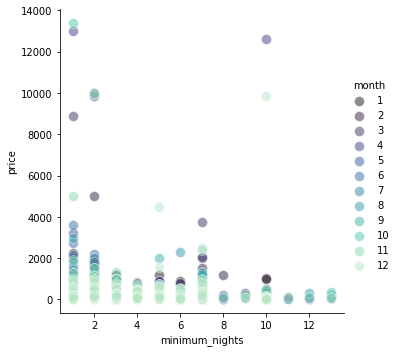

In [40]:
nights_14 = new_data[new_data.minimum_nights < 14]
g = sns.FacetGrid(nights_14[nights_14['month'] != 0], hue="month", palette='mako', height=5)
g.map(sns.scatterplot, "minimum_nights", "price", s=100, alpha=.5)
g.add_legend()

In [41]:
nights2_14 = nights_14[nights_14.price != 0][['price','minimum_nights']].groupby(['minimum_nights']).median().reset_index()

In [42]:
# nights_14

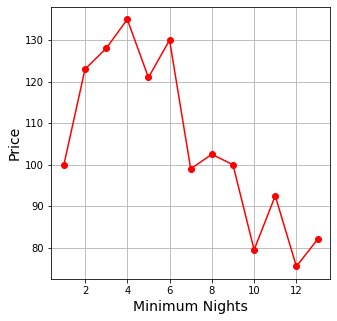

In [43]:
plt.figure(figsize=(5,5))
plt.plot(nights2_14.minimum_nights, nights2_14.price, color='red', marker='o')
plt.xlabel('Minimum Nights', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

For each minimum nights of booking, take the median price values as they can represent the main pattern and avoid the affect of extrem values.

## 4. time & price (last_review & price)

In [44]:
# set(new_data.year_review)

### heatmap

In [45]:
new_data1 = new_data[new_data.year != 0]

In [46]:
set(new_data1.year)

{2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021}

In [47]:
new_data1.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,last_review,availability_365,year,month,year_month
0,Manningham,Private room,60,1,4,1,2015-09-12,365,2015,9,2015-09
1,Port Phillip,Entire home/apt,95,3,42,10,2016-01-25,0,2016,1,2016-01
2,Melbourne,Private room,1000,1,2,1,2012-01-27,365,2012,1,2012-01
3,Casey,Entire home/apt,99,1,163,1,2020-01-09,341,2020,1,2020-01
4,Darebin,Private room,40,7,159,2,2017-08-24,0,2017,8,2017-08


In [48]:
# year
# sns.swarmplot(x='room_type', y='price', data=new_data1, hue='year_review', dodge=True, palette='viridis')

In [49]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
new_data2 = new_data[new_data.year != 0][['month','year','price']].drop_duplicates().reset_index(drop=True)
# new_data3 = new_data2.drop_duplicates().reset_index(drop=True)
new_data3 = new_data2.groupby(['month', 'year']).mean().reset_index()

In [50]:
new_data3.head()

,month,year,price
0,1,2012,1000.000000
1,1,2014,150.666667
2,1,2015,176.062500
3,1,2016,172.385965
4,1,2017,185.137931


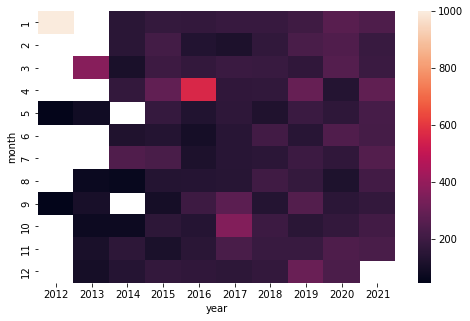

In [51]:
plt.figure(figsize=(8,5))
new_data4 = new_data3.pivot("month", "year", "price")
sns.heatmap(new_data4)

The price of the house/room is the highest in year 2021 and year 2021. And the price in other time is almost the same and much lower.

### line plot

In [52]:
review = new_data[new_data.year != 0][['number_of_reviews','year', 'month', 'year_month']].drop_duplicates().reset_index(drop=True)
review2 = review.groupby(['year']).median().reset_index()

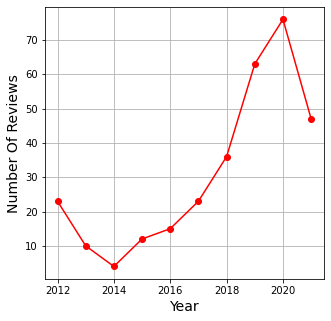

In [53]:
# year
plt.figure(figsize=(5,5))
plt.plot(review2.year, review2.number_of_reviews, color='red', marker='o')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number Of Reviews', fontsize=14)
plt.grid(True)
plt.show()

Airbnb is built in 2008, it is can be seen from above that with the time goes by, and as this dataset is end at 2021 Nov so the number of reviews showed decrease.

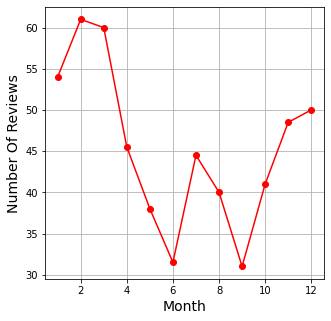

In [54]:
# month
review3 = new_data[new_data.year != 2021][['number_of_reviews','year', 'month']].drop_duplicates().reset_index(drop=True)
review4 = review.groupby(['month']).median().reset_index()

plt.figure(figsize=(5,5))
plt.plot(review4.month, review4.number_of_reviews, color='red', marker='o')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number Of Reviews', fontsize=14)
plt.grid(True)
plt.show()

Average of the number of reviews is selected based on different month. People are tend to book house/room in Feb, March, April, Dec and Nov. The value in Sep is much lower as is below 50 than other month.

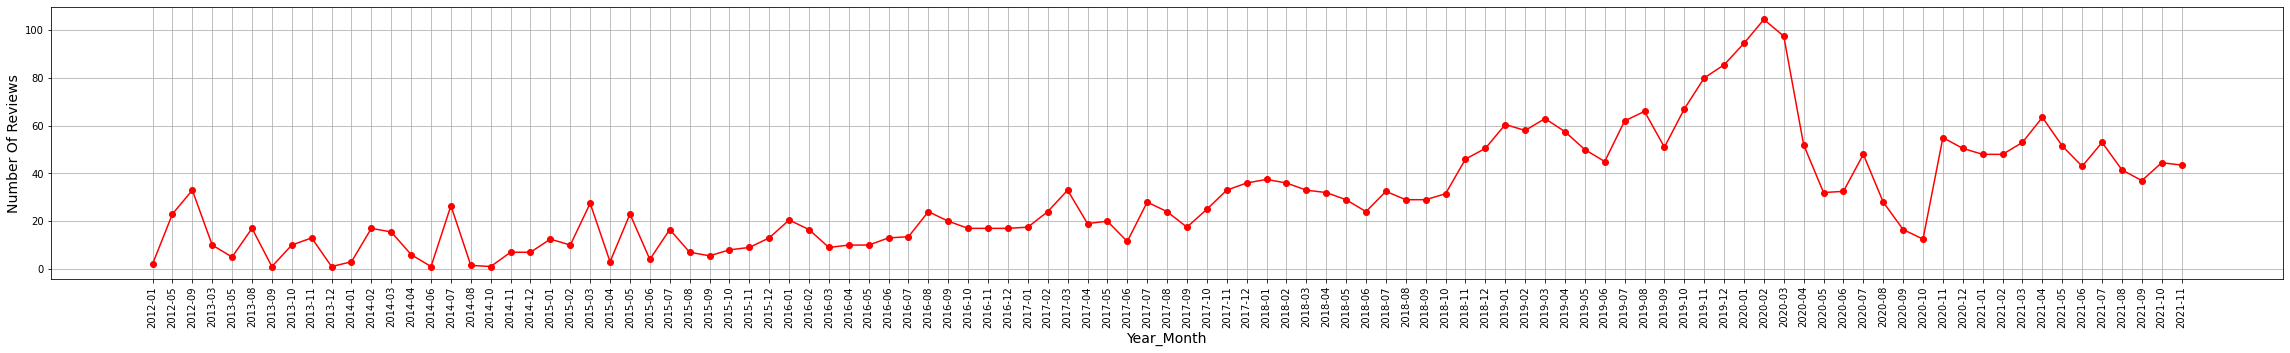

In [55]:
# year_month
review3 = new_data[new_data.year != 2021][['number_of_reviews','year_month']].drop_duplicates().reset_index(drop=True)
review4 = review.groupby(['year_month']).median().reset_index()

plt.figure(figsize=(40,5))
plt.plot(review4.year_month, review4.number_of_reviews, color='red', marker='o')
plt.xlabel('Year_Month', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Number Of Reviews', fontsize=14)
plt.grid(True)
plt.show()

The number of reviews tends to increase from 2012 to 2019, however after the Covid, it occurrs a big decrease as there less and less people want to book house/room outside for their own safety. Until 2020.10, the number of reviews keep in a balance at around 40-60 per month.

## 5. availability & price

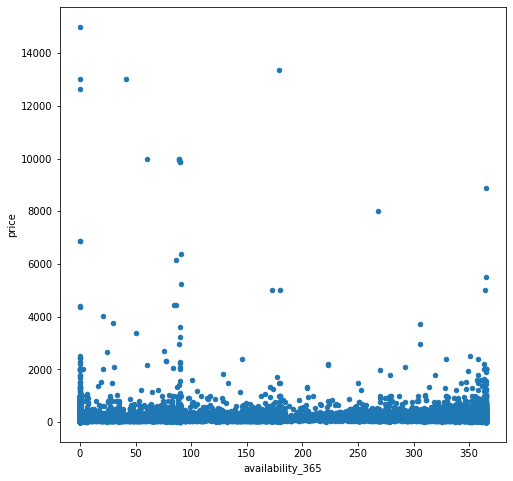

In [56]:
new_data.plot.scatter(x='availability_365', y='price', marker='o', figsize=(8,8))

There is not much relationship between the availibility and price

## 6. Covid

In [57]:
covid = pd.read_csv('/content/drive/MyDrive/summer_project_2021/airbnb/NCOV_COVID_Cases_by_LGA_20220114.csv')

In [58]:
covid.head()

,diagnosis_date,Localgovernmentarea
0,2020-03-11,Greater Geelong (C)
1,2020-03-08,Mornington Peninsula (S)
2,2020-03-09,Port Phillip (C)
3,2020-08-01,Whittlesea (C)
4,2020-03-01,Casey (C)


In [59]:
covid.shape

(429131, 2)

In [60]:
len(set(covid.Localgovernmentarea))

83

In [61]:
len(set(covid.diagnosis_date))

560

In [62]:
covid[['year', 'month','day']] = covid.diagnosis_date.str.split('-',expand=True,)

In [63]:
covid['year_month'] = covid['year'] + '-' + covid['month']

In [64]:
# covid.diagnosis_date
covid.head()

,diagnosis_date,Localgovernmentarea,year,month,day,year_month
0,2020-03-11,Greater Geelong (C),2020,03,11,2020-03
1,2020-03-08,Mornington Peninsula (S),2020,03,08,2020-03
2,2020-03-09,Port Phillip (C),2020,03,09,2020-03
3,2020-08-01,Whittlesea (C),2020,08,01,2020-08
4,2020-03-01,Casey (C),2020,03,01,2020-03


In [65]:
set(covid.year)

{'2020', '2021', '2022'}

In [66]:
covid['year'].groupby([covid.year]).agg('count')

year
2020     20368
2021    163495
2022    245268
Name: year, dtype: int64

In [67]:
new_covid = covid.groupby([covid.year_month]).agg('count').reset_index()[['year_month','day']]

In [68]:
new_covid.head()

,year_month,day
0,2020-01,4
1,2020-02,3
2,2020-03,949
3,2020-04,409
4,2020-05,289


In [69]:
combine_data = new_data.set_index('year_month').join(new_covid.set_index('year_month'))
combine_data = combine_data[combine_data['day'].notna()].reset_index()

In [70]:
combine_data.head()

,year_month,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,last_review,availability_365,year,month,day
0,2020-01,Casey,Entire home/apt,99,1,163,1,2020-01-09,341,2020,1,4.0
1,2020-01,Melbourne,Entire home/apt,242,2,298,1,2020-01-25,297,2020,1,4.0
2,2020-01,Yarra,Entire home/apt,84,3,80,10,2020-01-25,0,2020,1,4.0
3,2020-01,Stonnington,Private room,35,14,62,8,2020-01-01,86,2020,1,4.0
4,2020-01,Melbourne,Entire home/apt,204,3,163,4,2020-01-03,309,2020,1,4.0


[Text(0, 0.5, 'Confirmed Cases')]

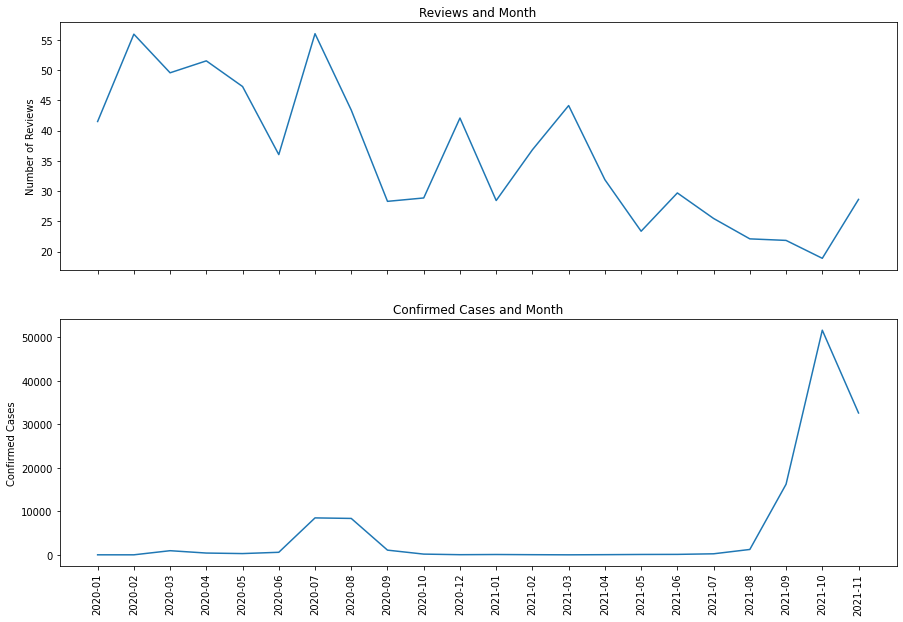

In [71]:
combine_data2 = combine_data.groupby(['year_month']).mean().reset_index()

fig, axs = plt.subplots(2, sharex=True)
plt.xticks(rotation=90)

axs[0].plot(combine_data2.year_month, combine_data2.number_of_reviews)
axs[0].set_title('Reviews and Month')
axs[0].set(ylabel='Number of Reviews')

axs[1].plot(combine_data2.year_month, combine_data2.day)
axs[1].set_title('Confirmed Cases and Month')
axs[1].set(ylabel='Confirmed Cases')

There is no obvious relationship between the price and the number of Covid-19 confirmed cases.

# Model

## Encoding qualitative data

In [72]:
new_data.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,last_review,availability_365,year,month,year_month
0,Manningham,Private room,60,1,4,1,2015-09-12,365,2015,9,2015-09
1,Port Phillip,Entire home/apt,95,3,42,10,2016-01-25,0,2016,1,2016-01
2,Melbourne,Private room,1000,1,2,1,2012-01-27,365,2012,1,2012-01
3,Casey,Entire home/apt,99,1,163,1,2020-01-09,341,2020,1,2020-01
4,Darebin,Private room,40,7,159,2,2017-08-24,0,2017,8,2017-08


In [74]:
# new data set for machine learning
x_df = new_data[['neighbourhood', 'room_type', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'year_month']]
y_df = new_data['price']

In [75]:
from sklearn.preprocessing import LabelEncoder

x_df[['neighbourhood', 'room_type', 'year_month']] = x_df[['neighbourhood', 'room_type', 'year_month']].apply(LabelEncoder().fit_transform)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [76]:
x_df.head()

,neighbourhood,room_type,minimum_nights,number_of_reviews,calculated_host_listings_count,year_month
0,14,2,1,4,1,29
1,23,0,3,42,10,33
2,17,2,1,2,1,1
3,5,0,1,163,1,81
4,6,2,7,159,2,52


## Regression

In [77]:
# split dataset to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.3, random_state=0)

In [78]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, x_df, y_df, cv=5, scoring='r2')
    return pred

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [79]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [80]:
print(lin_reg.intercept_)

256.7926862117763


In [81]:
coeff_df = pd.DataFrame(lin_reg.coef_, x_df.columns, columns=['Coefficient'])
coeff_df

,Coefficient
neighbourhood,0.124985
room_type,-64.431826
minimum_nights,0.266791
number_of_reviews,-0.298979
calculated_host_listings_count,-0.079823
year_month,-0.509212


In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [ ]:
# pred = lin_reg.predict(X_test)
# plt.scatter(y_test, pred)

In [83]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 159.7976494868175
MSE: 88039.47830917609
RMSE: 296.71447269921987
R2 Square -0.04892598914182433
Train set evaluation:
_____________________________________
MAE: 164.8288977949795
MSE: 176883.82195734722
RMSE: 420.57558411936753
R2 Square -0.021087016531637692


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [90]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=6)

X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
train_pred = lin_reg.predict(X_train_2_d)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

# test set evaluation to check the overfitting:
# degree: 1 R2 Square 0.04855641462319682
# degree: 2 R2 Square 0.0666770246491033
# degree: 3 R2 Square -0.20663088192051027
# the train set r-square is becoming higher but the one of test set is getting worse
# which indicates there is a big overfitting problem in this dataset and the regression result is not good in this case.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


Test set evaluation:
_____________________________________
MAE: 9095.839411954412
MSE: 92367676340.9551
RMSE: 303920.50990506564
R2 Square -1100492.3029069297
Train set evaluation:
_____________________________________
MAE: 104.96482222451348
MSE: 142501.22450867007
RMSE: 377.49334366140823
R2 Square 0.1773914167189945


In [91]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=500)
rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 102.07930962742486
MSE: 82004.50835057077
RMSE: 286.36429307888716
R2 Square 0.0229762637434191
Train set evaluation:
_____________________________________
MAE: 52.147133518555
MSE: 48816.77512217462
RMSE: 220.9451857863724
R2 Square 0.71819822347452


Random Forest Regressor has better result than previous one but there is stil a overfitting problem.

## Gradient Boost

In [92]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 1000,
          'max_depth': 6,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'huber'}

gb_reg = GradientBoostingRegressor(**params)
gb_reg.fit(X_train, y_train)

test_pred = gb_reg.predict(X_test)
train_pred = gb_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 80.56537427588685
MSE: 83510.21282823113
RMSE: 288.9813364704218
R2 Square 0.005036896212880726
Train set evaluation:
_____________________________________
MAE: 77.19973198138496
MSE: 144744.13257416608
RMSE: 380.45253655898534
R2 Square 0.16444391095159705


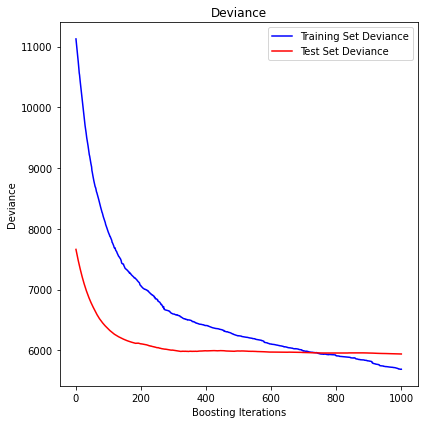

In [93]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gb_reg.staged_predict(X_test)):
    test_score[i] = gb_reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gb_reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

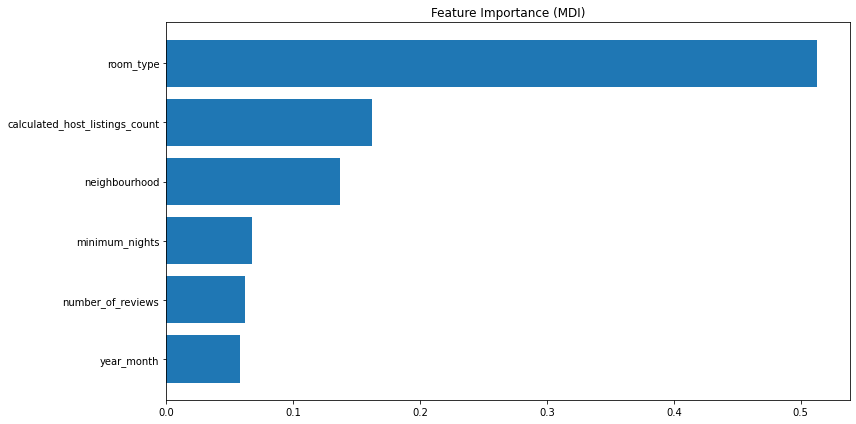

In [94]:
# feature importance
feature_importance = gb_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(x_df.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
fig.tight_layout()
plt.show()

The reult shows that year_month, number_of_reviews and minimum_night have the least importance in this case that their importances are all lower than 0.1.

## Classification 

In [96]:
df = pd.read_csv("/content/drive/MyDrive/summer_project_2021/airbnb/listings.csv")

In [97]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.77247,145.09232,Private room,60,1,4,2015-09-12,0.03,1,365
1,10803,Room in Cool Deco Apartment in Brunswick East,38901,Lindsay,NaN,Moreland,-37.76606,144.97951,Private room,28,4,145,2019-12-17,2.26,1,278
2,12936,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,50121,The A2C Team,NaN,Port Phillip,-37.85999,144.97662,Entire home/apt,95,3,42,2016-01-25,0.76,10,0
3,33111,Million Dollar Views Over Melbourne,143550,Paul,NaN,Melbourne,-37.82163,144.96672,Private room,1000,1,2,2012-01-27,0.02,1,365
4,38271,Melbourne - Old Trafford Apartment,164193,Daryl & Dee,NaN,Casey,-38.05725,145.33936,Entire home/apt,101,1,161,2020-01-09,1.25,1,329


In [98]:
new_data.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,last_review,availability_365,year,month,year_month
0,Manningham,Private room,60,1,4,1,2015-09-12,365,2015,9,2015-09
1,Port Phillip,Entire home/apt,95,3,42,10,2016-01-25,0,2016,1,2016-01
2,Melbourne,Private room,1000,1,2,1,2012-01-27,365,2012,1,2012-01
3,Casey,Entire home/apt,99,1,163,1,2020-01-09,341,2020,1,2020-01
4,Darebin,Private room,40,7,159,2,2017-08-24,0,2017,8,2017-08


Price will be the target value and there will be a new feature 'price_label' which is collected from 'price'.

In [127]:
new_data.price.describe()
# max: 15000

count    18016.000000
mean       173.141596
std        382.689938
min          0.000000
25%         70.000000
50%        110.000000
75%        180.000000
max      15000.000000
Name: price, dtype: float64

In [130]:
price_label = pd.cut(new_data.price, bins = [0,180,1000,15000], 
             labels = ['low', 'medium', 'high'])
new_data.insert(3, 'price_label', price_label)

In [131]:
new_data.price_label.value_counts()

low       13533
medium     4333
high        149
Name: price_label, dtype: int64

In [132]:
# as year_month has the lowest importance, remove it from the dataframe
new_data[['neighbourhood', 'room_type', 'price_label']] = new_data[['neighbourhood', 'room_type', 'price_label']].apply(LabelEncoder().fit_transform)
X = new_data[['neighbourhood', 'room_type', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count']]

y = new_data['price_label']

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [133]:
y.value_counts()

1    13533
2     4333
0      149
3        1
Name: price_label, dtype: int64

In [124]:
# X.head()

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.76
Accuracy of Logistic regression classifier on test set: 0.74


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic regression in classification label result is good and better than  that of the previous one.

### Decison Tree

In [136]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.93
Accuracy of Decision Tree classifier on test set: 0.74


### K-Nearest Neighbors

In [137]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.76


### Linear Discriminat Analysis

In [138]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.75
Accuracy of LDA classifier on test set: 0.74


### Support Vector Machine

In [139]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.76
Accuracy of SVM classifier on test set: 0.74
